# Multi-class Classification

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget
from sklearn.datasets import make_blobs
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
np.set_printoptions(precision=2)
from lab_utils_multicalss_TF import *
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

In [2]:
classes =4
m=100
centers = [[-5, 2], [-2, -2], [1, 2], [5, -2]]
std = 1.0
X_train, y_train = make_blobs(n_samples=m, centers=centers, cluster_std=std, random_state=30)
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")

X_train: (100, 2), y_train: (100,)


/Users/haoyiwen/Documents/ai/2022-Machine-Learning-Specializatio/practise/Advanced Learning Algorithms/week2/lab_utils_multicalss_TF.py:71: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(X[idx, 0], X[idx, 1],  marker=m,


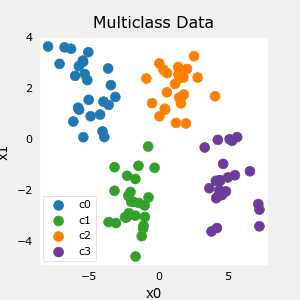

In [3]:
plt_mc(X_train, y_train, classes, centers, std)

In [4]:
print(f"unique classes {np.unique(y_train)}")

unique classes [0 1 2 3]


In [5]:
print(f"class representation {y_train[-10:]}")

class representation [3 0 2 1 2 1 1 2 2 0]


In [6]:
print(f"shape of X_train: {X_train.shape}, shape of y_train: {y_train.shape}")

shape of X_train: (100, 2), shape of y_train: (100,)


In [ ]:
tf.random.set_seed(1234)
model = Sequential([
    Dense(2, activation='relu', name="l1"),
    Dense(4, activation="linear", name="l2")
])

In [8]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer = tf.keras.optimizers.Adam(0.01)
)
model.fit(
    X_train, y_train,
    epochs=200
)

Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.1447  
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.9493
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.7946
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.6703 
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.5681
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.4828
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.4105
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.3494 
Epoch 9/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2982
Epoch 10/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2562
Epoch 11/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2216
Epoch 12/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1906
Epoch 13/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1673
Epoch 14/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1485
Epoch 15/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1327 
Epoch 16/200
4/4 ━━━━━━━━━━━━

In [17]:
# Make predictions to see the linear output (logits) from the model
predictions = model.predict(X_train)
print(f"Shape of predictions: {predictions.shape}")
print(f"First 5 predictions (logits):\n{predictions[:5]}")

# Apply softmax to convert logits to probabilities
probabilities = tf.nn.softmax(predictions)
print(f"\nFirst 5 probabilities after softmax:\n{probabilities[:5].numpy()}")

# Get predicted classes
predicted_classes = np.argmax(predictions, axis=1)
print(f"\nFirst 10 predicted classes: {predicted_classes[:10]}")
print(f"First 10 actual classes: {y_train[:10]}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Shape of predictions: (100, 4)
First 5 predictions (logits):
[[-14.66   5.13  -6.47  11.22]
 [-15.93   5.75  -7.35  12.31]
 [-15.62   5.6   -7.13  12.04]
 [  5.57   0.87  -5.23  -9.27]
 [ -5.94   0.83  -0.44   3.71]]

First 5 probabilities after softmax:
[[5.76e-12 2.27e-03 2.08e-08 9.98e-01]
 [5.48e-13 1.43e-03 2.92e-09 9.99e-01]
 [9.68e-13 1.60e-03 4.69e-09 9.98e-01]
 [9.91e-01 8.97e-03 2.02e-05 3.55e-07]
 [6.03e-05 5.24e-02 1.47e-02 9.33e-01]]

First 10 predicted classes: [3 3 3 0 3 3 3 3 2 0]
First 10 actual classes: [3 3 3 0 3 3 3 3 2 0]


184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 283us/step


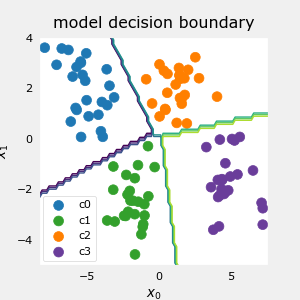

In [9]:
plt_cat_mc(X_train, y_train, model, classes)

In [10]:
l1=model.get_layer("l1")
W1, b1 = l1.get_weights()
print(W1, b1)

[[ 0.29 -1.17]
 [-2.28 -0.93]] [1.34 1.06]


/Users/haoyiwen/Documents/ai/2022-Machine-Learning-Specializatio/practise/Advanced Learning Algorithms/week2/lab_utils_multicalss_TF.py:71: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(X[idx, 0], X[idx, 1],  marker=m,
/Users/haoyiwen/Documents/ai/2022-Machine-Learning-Specializatio/practise/Advanced Learning Algorithms/week2/lab_utils_multicalss_TF.py:71: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(X[idx, 0], X[idx, 1],  marker=m,


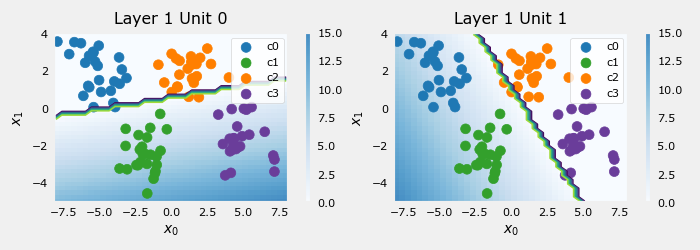

In [11]:
plt_layer_relu(X_train, y_train.reshape(-1,), W1, b1,classes)

In [12]:
l2=model.get_layer("l2")

In [13]:
W2, b2= l2.get_weights()
Xl2 = np.zeros_like(X_train)
print(Xl2.shape)

(100, 2)


In [14]:
Xl2=np.maximum(0, np.dot(X_train, W1) +b1)

/Users/haoyiwen/Documents/ai/2022-Machine-Learning-Specializatio/practise/Advanced Learning Algorithms/week2/lab_utils_multicalss_TF.py:71: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(X[idx, 0], X[idx, 1],  marker=m,
/Users/haoyiwen/Documents/ai/2022-Machine-Learning-Specializatio/practise/Advanced Learning Algorithms/week2/lab_utils_multicalss_TF.py:71: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(X[idx, 0], X[idx, 1],  marker=m,
/Users/haoyiwen/Documents/ai/2022-Machine-Learning-Specializatio/practise/Advanced Learning Algorithms/week2/lab_utils_multicalss_TF.py:71: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(X[idx, 0], X[idx, 1],  marker=m,
/Users/haoyiwen/Documents/ai/2022-Machine-Learning-Specializatio/practise/Advanced Learning Algorithms/week2/lab_utils_multicalss_TF.py:71: UserWarn

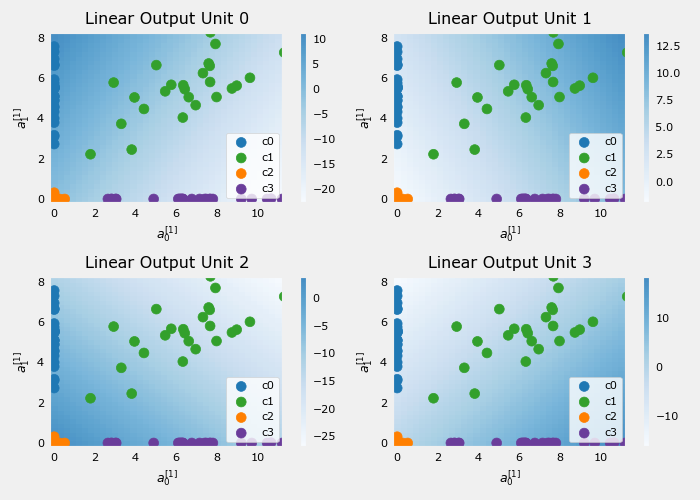

In [15]:
plt_output_layer_linear(Xl2, y_train.reshape(-1,), W2,b2,classes,x0_rng = (-0.25,np.amax(Xl2[:,0])), x1_rng = (-0.25,np.amax(Xl2[:,1])))